In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import pylab
import pygraphviz
import networkx as nx
import graphviz
warnings.filterwarnings("ignore", category=FutureWarning)

data= pd.read_csv("incidents_datasets.csv")
pd.set_option("display.max_columns",None)
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]
data_cat["notified"] = data["notified"]
data_cat["overallseverity"] = data["overallseverity"]
data_cat.drop('dstipcategory_dominate', axis=1, inplace=True)
data_cat.drop('srcipcategory_dominate', axis=1, inplace=True)
data_cat.head(1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ipcategory_scope,weekday,ipcategory_name,categoryname,alert_ids,ip,grandparent_category,client_code,notified,overallseverity
0,Internet,Tue,INTERNET,Attack,Nhq,YT.LB.32.21,A,DPM,0,3


In [109]:
# data.head(63)
weekdays = list(data_cat[0:200].weekday.unique())
ipcategory_scope= list(data_cat[0:200].ipcategory_scope.unique())
ips = list(data_cat[0:200].ip)
alerts = list(data_cat[0:200].alert_ids)
notify_cat=list(data_cat[0:200].notified.unique())
ip_cat_name=list(data_cat[0:200].categoryname.unique())
overallseverity=list(data_cat[0:200].overallseverity.unique())

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


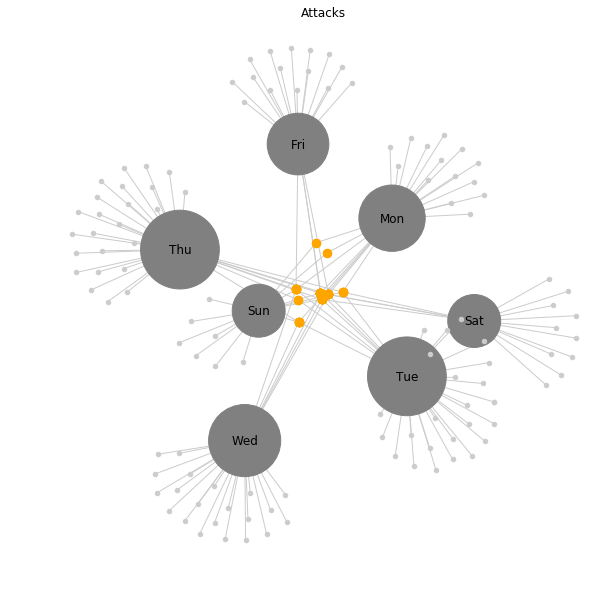

In [118]:
plt.figure(figsize=(10, 10))
g = nx.from_pandas_edgelist(data_cat[0:200], source='ip', target='weekday') 
layout = nx.spring_layout(g,seed=200)
week_size = [g.degree(weekday) * 200 for weekday in weekdays]
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=weekdays, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=ips, node_color='#cccccc', node_size=20)
popular_ips = [ip for ip in ips if g.degree(ip) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_ips, node_color='orange', node_size=70)
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


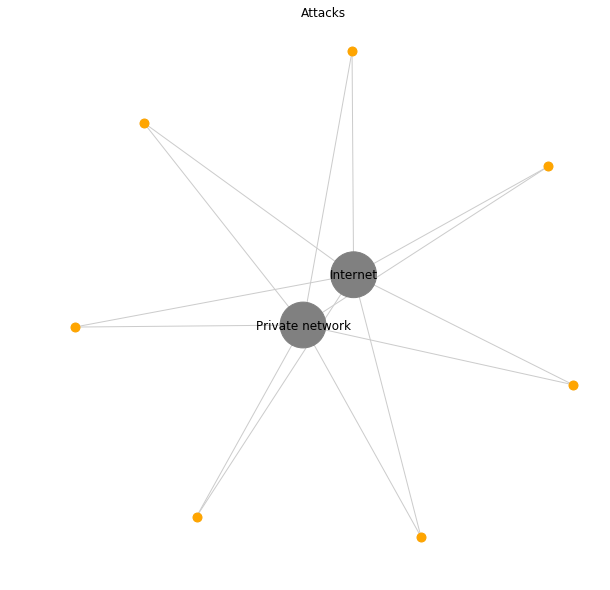

In [128]:
plt.figure(figsize=(10, 10))
g1 = nx.from_pandas_edgelist(data_cat[0:200], source='weekday', target='ipcategory_scope') 
layout = nx.spring_layout(g1,seed=200)
week_size = [g1.degree(weekday) * 300 for weekday in ipcategory_scope]
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=ipcategory_scope, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=weekdays, node_color='#cccccc', node_size=70)
popular_ips = [ip for ip in weekdays if g1.degree(ip) > 1]
nx.draw_networkx_nodes(g1, layout, nodelist=popular_ips, node_color='orange', node_size=80)
nx.draw_networkx_edges(g1, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(ipcategory_scope, ipcategory_scope))
nx.draw_networkx_labels(g1, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


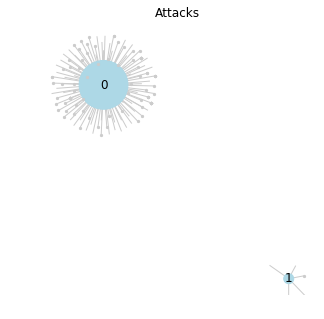

In [85]:
plt.figure(figsize=(5, 5))
g2 = nx.from_pandas_edgelist(data_cat[0:200], source='ip', target='notified') 
layout = nx.spring_layout(g2)
notify_size = [g2.degree(notify) * 20 for notify in notify_cat]
nx.draw_networkx_nodes(g2, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='lightblue')
nx.draw_networkx_nodes(g2, layout, nodelist=ips, node_color='#cccccc', node_size=5)
popular_ips = [ip for ip in ips if g2.degree(ip) > 1]
nx.draw_networkx_nodes(g2, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g2, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(notify_cat, notify_cat))
nx.draw_networkx_labels(g2, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


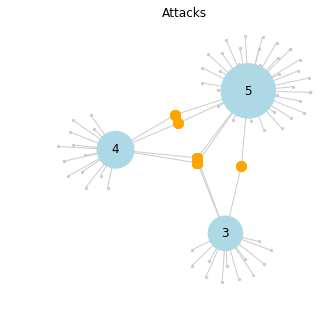

In [84]:
plt.figure(figsize=(5, 5))
g4 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='overallseverity') 
layout = nx.spring_layout(g4)
sever_size = [g4.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(g4,layout,with_labels=True, nodelist=overallseverity,  node_size=sever_size, node_color='lightblue')
nx.draw_networkx_nodes(g4, layout, with_labels=True,nodelist=ips, node_color='#cccccc', node_size=5)
popular_ip = [ip for ip in ips if g4.degree(ip) > 1]
nx.draw_networkx_nodes(g4, layout ,with_labels=True, nodelist=popular_ip, node_color='orange', node_size=100)
nx.draw_networkx_edges(g4, layout, with_labels=True,width=1, edge_color="#cccccc")
node_labels = dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(g4, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


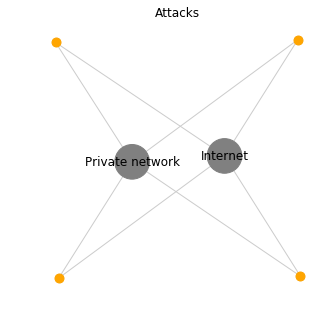

In [130]:
plt.figure(figsize=(5, 5))
g3 = nx.from_pandas_edgelist(data_cat[0:200], source='overallseverity', target='ipcategory_scope') 
layout = nx.spring_layout(g3,seed=200)
week_size = [g3.degree(weekday) * 300 for weekday in ipcategory_scope]
nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ipcategory_scope, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=overallseverity, node_color='#cccccc', node_size=70)
popular_ips = [ip for ip in overallseverity if g3.degree(ip) > 1]
nx.draw_networkx_nodes(g3, layout, nodelist=popular_ips, node_color='orange', node_size=80)
nx.draw_networkx_edges(g3, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(ipcategory_scope, ipcategory_scope))
nx.draw_networkx_labels(g3, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()